In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('covid_toy.csv')

In [3]:
df.head()

,age,gender,fever,cough,city,has_covid
0,60,Male,103.0,Mild,Kolkata,No
1,27,Male,100.0,Mild,Delhi,Yes
2,42,Male,101.0,Mild,Delhi,No
3,31,Female,98.0,Mild,Kolkata,No
4,65,Female,101.0,Mild,Mumbai,No


In [4]:
df.shape

(100, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        100 non-null    int64  
 1   gender     100 non-null    object 
 2   fever      90 non-null     float64
 3   cough      100 non-null    object 
 4   city       100 non-null    object 
 5   has_covid  100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [6]:
df.isnull().sum()

age           0
gender        0
fever        10
cough         0
city          0
has_covid     0
dtype: int64

In [7]:
# for col in df.columns:
#     if col != "Survived":
for i in df.columns:
    if i!='age':
        print(df[i].value_counts())
        

gender
Female    59
Male      41
Name: count, dtype: int64
fever
101.0    17
98.0     17
104.0    14
100.0    13
99.0     10
102.0    10
103.0     9
Name: count, dtype: int64
cough
Mild      62
Strong    38
Name: count, dtype: int64
city
Kolkata      32
Bangalore    30
Delhi        22
Mumbai       16
Name: count, dtype: int64
has_covid
No     55
Yes    45
Name: count, dtype: int64


# We have 
## categorical column
- Gender have 2 category i.e 'male' & 'female'
- Cough has 2 subfeatures i.e 'mild' and 'stong'
- city has 4 types 'Kolkata' , 'Bangalore', 'Delhi' , 'Mumbai'
- has_covid 2 types 'Yes' & 'No'

## numerical column
- fever

In [8]:
num=df.select_dtypes(include=np.number).columns.tolist()
cat=df.select_dtypes(include='object').columns.tolist()
print(num)
print(cat)

['age', 'fever']
['gender', 'cough', 'city', 'has_covid']


age


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


fever


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


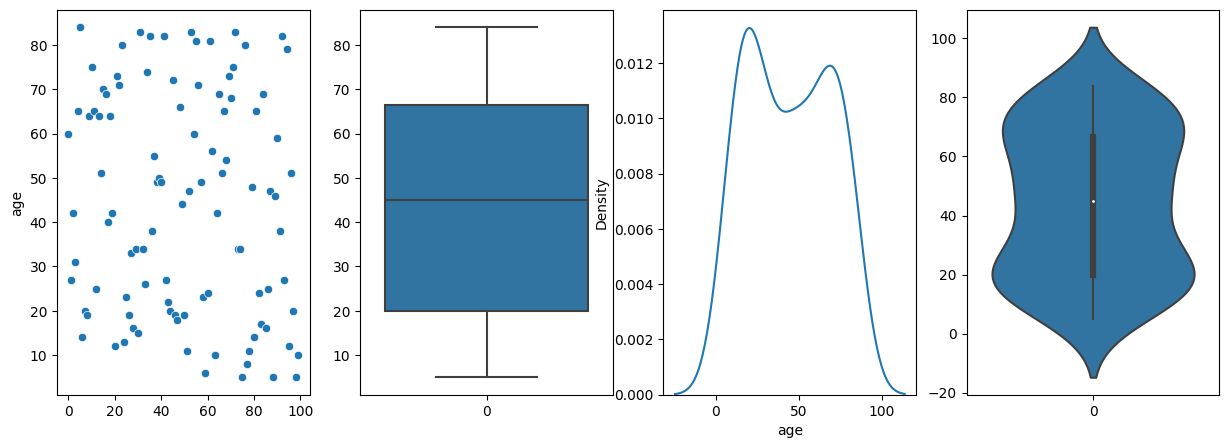

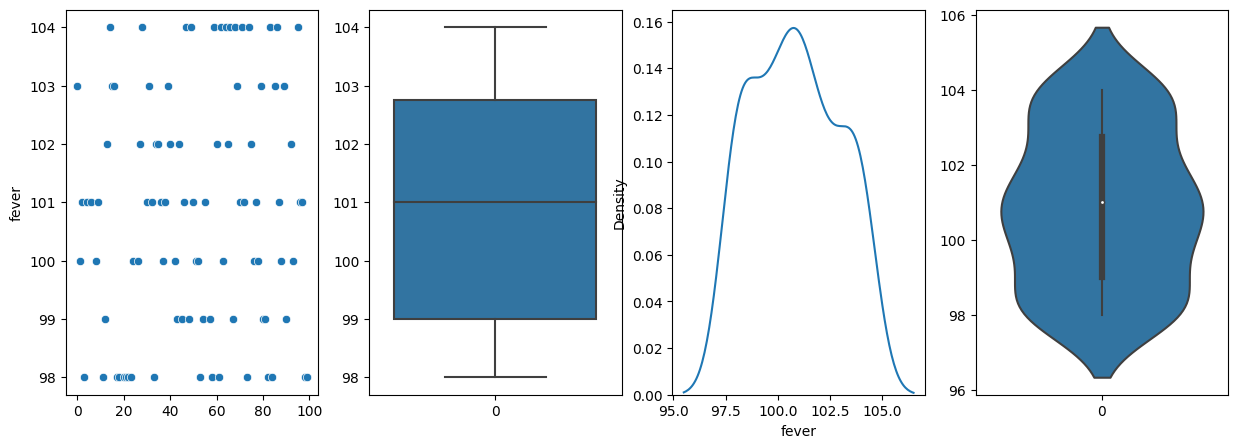

In [9]:
for i in num:
    
        print(i)
        plt.figure(figsize=(15,5))
        
        plt.subplot(1,4,1,)
        sns.scatterplot(df[i])
        # sns.histplot(df[i],kde=True)
        plt.subplot(1,4,2)
        sns.boxplot(df[i])
        plt.subplot(1,4,3)
        sns.kdeplot(x=df[i],data=df)
        plt.subplot(1,4,4)
        sns.violinplot(df[i])
         
        plt.plot

Distribution of the data in gender


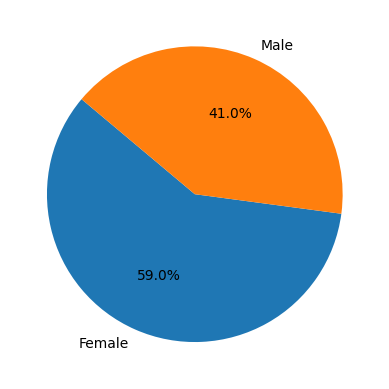

Distribution of the data in cough


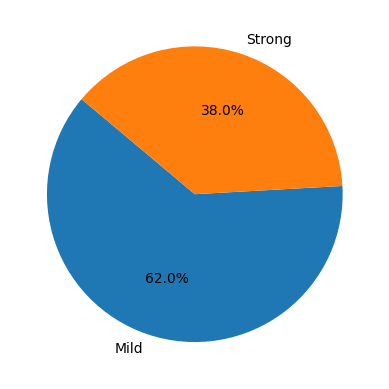

Distribution of the data in city


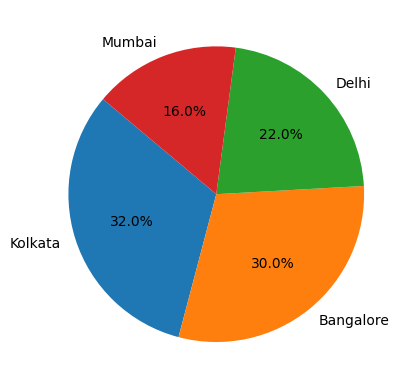

Distribution of the data in has_covid


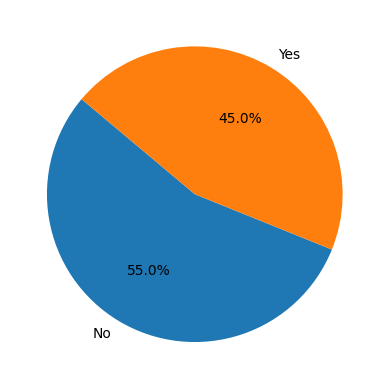

In [10]:
for i in cat:
    print('Distribution of the data in',i)
    value_counts = df[i].value_counts()
    
    # Plot the pie chart
    plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
    # plt.title('Distribution of COVID-19 Cases'), startangle=140
    plt.show()

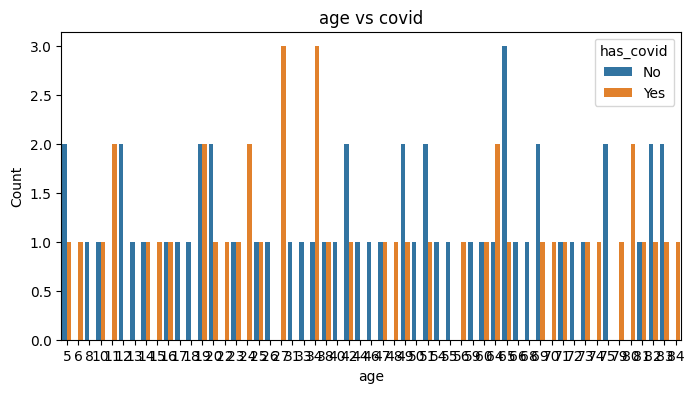

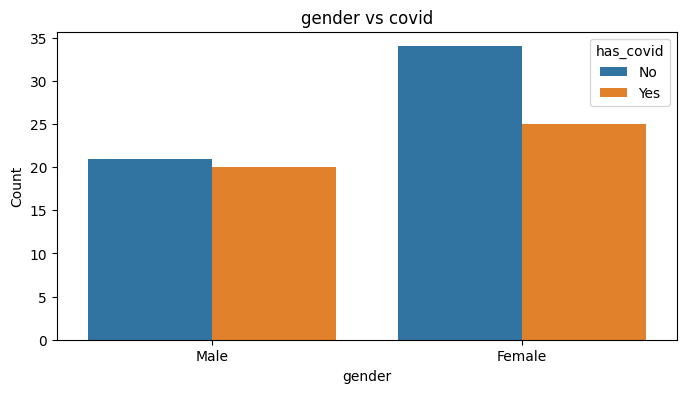

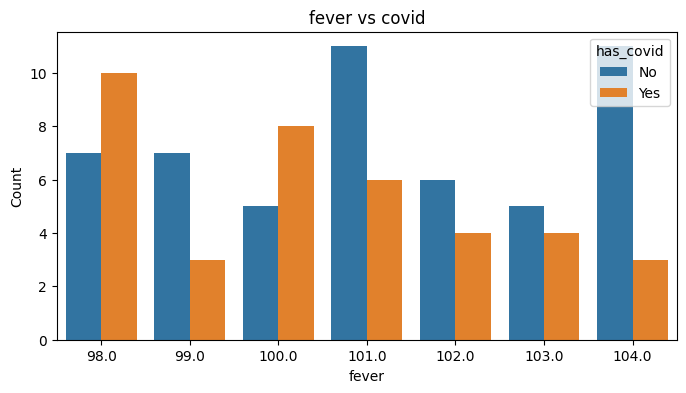

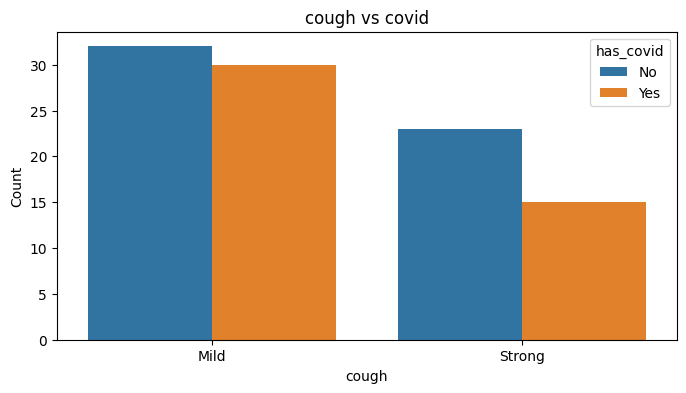

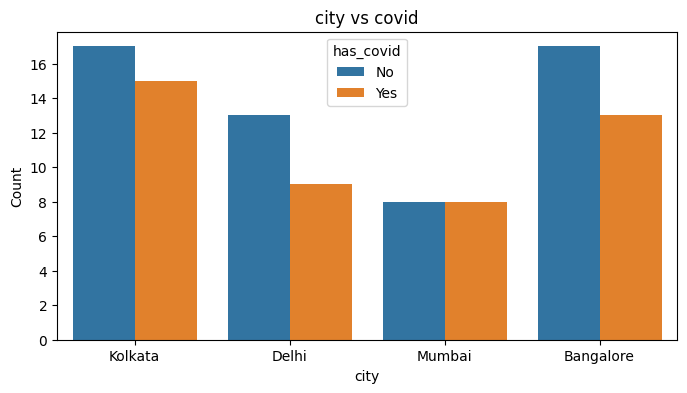

In [11]:
for col in df.columns:
    if col != "has_covid":
        plt.figure(figsize=(8,4))
        sns.countplot(x=col, hue="has_covid", data=df)
        # sns.scatterplot(x=col, hue="has_covid", data=df)
        # sns.scatterplot(x=col, y="has_covid",data=df)
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.title(f"{col} vs covid")
        plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

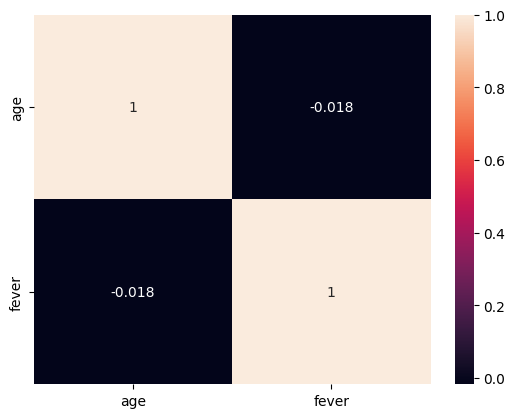

In [12]:
df1=df.select_dtypes(exclude='object')
sns.heatmap(df1.corr(),annot=True)
plt.show

# Impute Missing Values

In [13]:
mean=df.fever.mean()
df['Imp_fever']=df['fever'].fillna(mean)
df

,age,gender,fever,cough,city,has_covid,Imp_fever
0,60,Male,103.0,Mild,Kolkata,No,103.0
1,27,Male,100.0,Mild,Delhi,Yes,100.0
2,42,Male,101.0,Mild,Delhi,No,101.0
3,31,Female,98.0,Mild,Kolkata,No,98.0
4,65,Female,101.0,Mild,Mumbai,No,101.0
...,...,...,...,...,...,...,...
95,12,Female,104.0,Mild,Bangalore,No,104.0
96,51,Female,101.0,Strong,Kolkata,Yes,101.0
97,20,Female,101.0,Mild,Bangalore,No,101.0
98,5,Female,98.0,Strong,Mumbai,No,98.0


In [14]:
df.drop(['fever'],inplace=True,axis=1)

In [15]:
df.sample(5)

,age,gender,cough,city,has_covid,Imp_fever
60,24,Female,Strong,Bangalore,Yes,102.0
95,12,Female,Mild,Bangalore,No,104.0
98,5,Female,Strong,Mumbai,No,98.0
30,15,Male,Mild,Delhi,Yes,101.0
85,16,Female,Mild,Bangalore,Yes,103.0


In [16]:
df.isnull().sum()

age          0
gender       0
cough        0
city         0
has_covid    0
Imp_fever    0
dtype: int64

In [17]:
df.rename(columns={'Imp_fever':'fever'},inplace=True)
df.head()

,age,gender,cough,city,has_covid,fever
0,60,Male,Mild,Kolkata,No,103.0
1,27,Male,Mild,Delhi,Yes,100.0
2,42,Male,Mild,Delhi,No,101.0
3,31,Female,Mild,Kolkata,No,98.0
4,65,Female,Mild,Mumbai,No,101.0


In [18]:
from sklearn.preprocessing import LabelEncoder  

In [19]:
le = LabelEncoder()

In [20]:
df['gender_encoded'] = le.fit_transform(df['gender'])
print(df[['gender', 'gender_encoded']].head())
df['cough_encoded'] = le.fit_transform(df['cough'])
print(df[['cough', 'cough_encoded']].head())
df['city_encoded'] = le.fit_transform(df['city'])
print(df[['city', 'city_encoded']].head())
df['has_covid_encoded'] = le.fit_transform(df['has_covid'])
print(df[['has_covid', 'has_covid_encoded']].head())


   gender  gender_encoded
0    Male               1
1    Male               1
2    Male               1
3  Female               0
4  Female               0
  cough  cough_encoded
0  Mild              0
1  Mild              0
2  Mild              0
3  Mild              0
4  Mild              0
      city  city_encoded
0  Kolkata             2
1    Delhi             1
2    Delhi             1
3  Kolkata             2
4   Mumbai             3
  has_covid  has_covid_encoded
0        No                  0
1       Yes                  1
2        No                  0
3        No                  0
4        No                  0


In [21]:
df.drop(['gender','cough','city','has_covid'],axis=1,inplace=True)

In [22]:
df.sample(5)

,age,fever,gender_encoded,cough_encoded,city_encoded,has_covid_encoded
71,75,104.0,0,1,1,0
68,54,104.0,0,1,2,0
57,49,99.0,0,1,0,0
16,69,103.0,0,0,2,1
53,83,98.0,1,0,1,1


In [23]:
#df.rename(columns={'gender':'gender_encoded','cough':'cough_encoded','city':'city_encoded','has_covid':'has_covid_encoded'},inplace=True)
df.rename(columns={
    'gender': 'gender_encoded',
    'cough': 'cough_encoded',
    'city': 'city_encoded',
    'has_covid': 'has_covid_encoded'
}, inplace=True)
df

,age,fever,gender_encoded,cough_encoded,city_encoded,has_covid_encoded
0,60,103.0,1,0,2,0
1,27,100.0,1,0,1,1
2,42,101.0,1,0,1,0
3,31,98.0,0,0,2,0
4,65,101.0,0,0,3,0
...,...,...,...,...,...,...
95,12,104.0,0,0,0,0
96,51,101.0,0,1,2,1
97,20,101.0,0,0,0,0
98,5,98.0,0,1,3,0


In [24]:
y=df['has_covid_encoded']
x=df.drop(["has_covid_encoded"],axis=1)

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [27]:
x_train

,age,fever,gender_encoded,cough_encoded,city_encoded
55,81,101.0,0,0,3
88,5,100.0,0,0,2
26,19,100.0,0,0,2
42,27,100.0,1,0,1
69,73,103.0,0,0,1
...,...,...,...,...,...
60,24,102.0,0,1,0
71,75,104.0,0,1,1
14,51,104.0,1,0,0
92,82,102.0,0,1,2


In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
LR=LogisticRegression()

In [30]:
# LR.fit(x_train,y_train)
LR.fit(x_train,y_train)

LogisticRegression()

In [31]:
y_pred=LR.predict(x_test)

In [32]:
y_pred

array([0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0])

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
accuracy_score(y_pred,y_test)


0.75

In [34]:
# from sklearn.linear_model import train_test_split
# x_train,x_test,y_train,y_test=(x,y,test_size=0.2,random_state=42) train test
# LR.fit(x_train,y_train) fitting 80% data
# y_pred=LR.predict(x_test) prediction on 20% data
# y_pred
# accuracy_score(y_pred,y_test) score

In [35]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
DT=DecisionTreeClassifier()

In [37]:
DT.fit(x_train,y_train)

DecisionTreeClassifier()

In [38]:
y_pred=DT.predict(x_test)
y_pred

array([0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1])

In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
accuracy_score(y_pred,y_test)

0.45

In [40]:
import pickle

In [41]:
# Save the model to a file
filename = 'Covid_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(LR, file)

In [ ]:
# test input should match with input columns of the dataset